# RandomForestClassifier: make_moons dataset

### Initial imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_moons

In [33]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X shape: (100, 2)
y shape: (100,)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

rf = RandomForestClassifier(n_estimators=5, random_state=2)
rf.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_split',
 'random_state')

In [29]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [30]:
rf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1872583848, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=794921487, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=111352301, splitter='best'),
 DecisionTreeClassifier(

In [31]:
print("train set accuracy: {:.3f}".format(rf.score(X_train, y_train)))
print("test set accuracy: {:.3f}".format(rf.score(X_test, y_test)))

train set accuracy: 0.960
test set accuracy: 0.920


# RandomForestRegressor: Breast Cancer dataset

In [41]:
from sklearn.datasets import load_breast_cancer

In [42]:
cancer = load_breast_cancer()
print("cancer keys:\n{}".format(cancer.keys()))

cancer keys:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [43]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=.25, random_state=0)

In [44]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_split',
 'random_state')

In [45]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [46]:
print("train set accuracy: {:.3f}".format(rf.score(X_train, y_train)))
print("test set accuracy: {:.3f}".format(rf.score(X_test, y_test)))

train set accuracy: 1.000
test set accuracy: 0.972


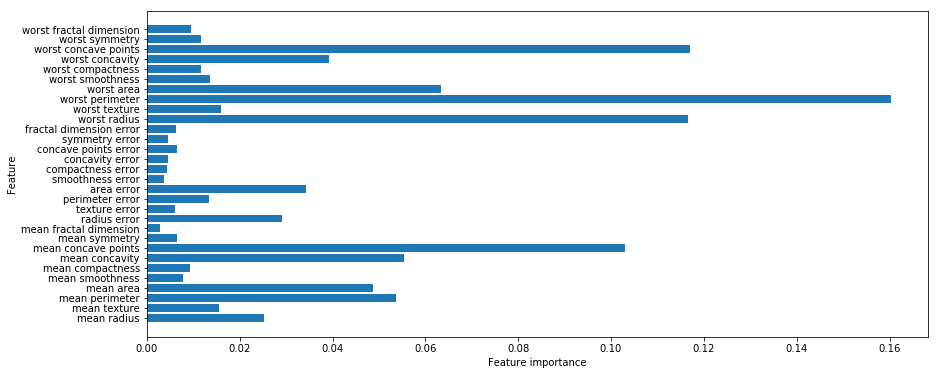

In [49]:
def plot_feature_importances_cancer(model):
    plt.figure(figsize=(14,6))
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(rf)